In [11]:
import mlrose_hiive as mlrose
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [24]:
# Define the adjacency list for the graph
adjacency_list = {
    0: [1, 2, 3],
    1: [0, 2, 3],
    2: [0, 1, 3],
    3: [0, 1, 2]
}

In [231]:
adjacency_list = {
    0: [1, 2, 3, 4],
    1: [0, 2, 3],
    2: [0, 1, 3],
    3: [0, 1, 2, 4],
    4: [0, 3]
}


In [25]:
def complete_graph_adjacency_list(k):
    adjacency_list = {}
    for i in range(k):
        neighbors = [j for j in range(k) if j != i]
        adjacency_list[i] = neighbors
    return adjacency_list

k = 7
adjacency_list = complete_graph_adjacency_list(k)
print(adjacency_list)


{0: [1, 2, 3, 4, 5, 6], 1: [0, 2, 3, 4, 5, 6], 2: [0, 1, 3, 4, 5, 6], 3: [0, 1, 2, 4, 5, 6], 4: [0, 1, 2, 3, 5, 6], 5: [0, 1, 2, 3, 4, 6], 6: [0, 1, 2, 3, 4, 5]}


{0: [1, 2, 3, 4], 1: [0, 2, 3, 4], 2: [0, 1, 3, 4], 3: [0, 1, 2, 4], 4: [0, 1, 2, 3]}


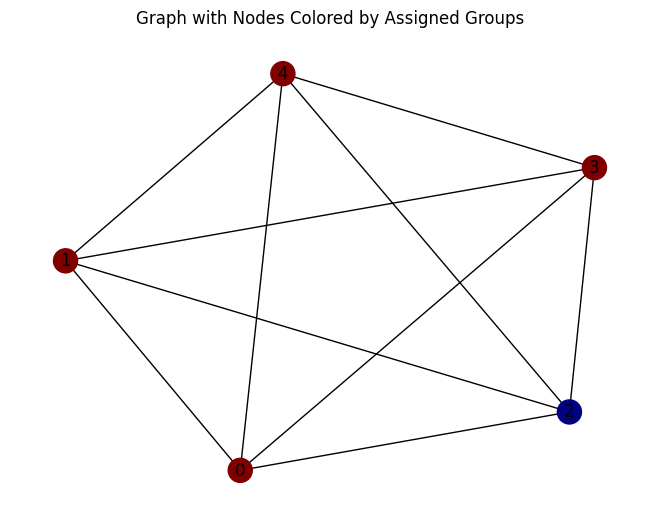

In [18]:
import mlrose_hiive as mlrose
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def complete_graph_adjacency_list(k):
    adjacency_list = {}
    for i in range(k):
        neighbors = [j for j in range(k) if j != i]
        adjacency_list[i] = neighbors
    return adjacency_list

k = 5
adjacency_list = complete_graph_adjacency_list(k)
print(adjacency_list)

class GraphGenusFitness:
    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def evaluate(self, state):
        # Convert the state (a permutation) into a new adjacency list
        new_adj_list = {i: [] for i in range(len(self.adjacency_list))}
        for i, vertex in enumerate(state):
            new_adj_list[i] = [state[neighbor] for neighbor in self.adjacency_list[vertex]]

        # Create a new graph with the updated adjacency list
        G = nx.Graph()
        for node, neighbors in new_adj_list.items():
            for neighbor in neighbors:
                if not G.has_edge(node, neighbor):
                    G.add_edge(node, neighbor)

        # Compute the Euler characteristic
        V = len(G.nodes)
        E = len(G.edges)
        F = 1  # Simplified formula for planar graphs: Assume 1 face for simplicity

        # The genus (assuming connected graph and orientable surface)
        genus = (2 - (V - E + F)) // 2

        return genus

    def get_prob_type(self):
        return 'discrete'

# Define the optimization problem
problem = mlrose.DiscreteOpt(length=len(adjacency_list), fitness_fn=GraphGenusFitness(adjacency_list),
                             maximize=False, max_val=len(adjacency_list))

# Choose and configure the optimization algorithm
schedule = mlrose.GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001)

# Run simulated annealing
result = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=1000, max_iters=5000,
                                    random_state=62, curve=True)

# Extract the best state and fitness curve
best_state = result[0]
fitness_curve = result[2]

# Decode fitness curve data
decoded_data = [(i, fitness) for i, fitness in enumerate(fitness_curve)]

# Initialize the final adjacency list with the initial adjacency list
final_adjacency_list = adjacency_list.copy()

# Initialize previous genus number for comparison
prev_genus = None

# Iterate over the decoded data to update the adjacency list at each iteration
for iteration, genus_number in decoded_data:
    # Ensure genus_number is a scalar
    if isinstance(genus_number, np.ndarray) and genus_number.size == 1:
        genus_number = float(genus_number)  # Convert to float if needed
    elif isinstance(genus_number, np.ndarray):
        continue  # Skip arrays with more than one element
    else:
        genus_number = float(genus_number)  # Convert to float if scalar

    print(f"Iteration: {iteration}, Genus number: {genus_number}, Prev Genus: {prev_genus}")
    if prev_genus is None or any(genus_number_elem != prev_genus_elem for genus_number_elem, prev_genus_elem in zip(genus_number, prev_genus)):
        print(f"Iteration {iteration}: Genus number {genus_number}")
        # Print the current state and corresponding adjacency list
        current_state = np.argsort(best_state)
        new_adj_list = {i: [] for i in range(len(adjacency_list))}
        for i, vertex in enumerate(current_state):
            new_adj_list[i] = [current_state[neighbor] for neighbor in adjacency_list[vertex]]

        # Update final adjacency list
        final_adjacency_list = new_adj_list

        # Print multiple adjacency lists
        print("Multiple Adjacency Lists:")
        for _ in range(3):  # Print three adjacency lists
            print("Corresponding Adjacency List:")
            for node, neighbors in final_adjacency_list.items():
                print(f"Node {node}: Neighbors {neighbors}")

        prev_genus = genus_number


# Function to draw the graph
def draw_graph(adjacency_list, best_state):
    G = nx.Graph()
    for node, neighbors in adjacency_list.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    node_colors = [best_state[node] for node in G.nodes]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.jet)
    plt.title('Graph with Nodes Colored by Assigned Groups')
    plt.show()

# Draw the graph
draw_graph(adjacency_list, best_state)


In [239]:
class GraphGenusFitness:
    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def evaluate(self, state):
        # Convert the state (a permutation) into a new adjacency list
        new_adj_list = {i: [] for i in range(len(self.adjacency_list))}
        for i, vertex in enumerate(state):
            new_adj_list[i] = [state[neighbor] for neighbor in self.adjacency_list[vertex]]

        # Create a new graph with the updated adjacency list
        G = nx.Graph()
        for node, neighbors in new_adj_list.items():
            for neighbor in neighbors:
                if not G.has_edge(node, neighbor):
                    G.add_edge(node, neighbor)

        # Compute the Euler characteristic
        V = len(G.nodes)
        E = len(G.edges)
        F = 1  # Simplified formula for planar graphs: Assume 1 face for simplicity

        # The genus (assuming connected graph and orientable surface)
        genus = (2 - (V - E + F)) // 2

        return genus

    def get_prob_type(self):
        return 'discrete'

# Define the optimization problem
problem = mlrose.DiscreteOpt(length=len(adjacency_list), fitness_fn=GraphGenusFitness(adjacency_list),
                             maximize=False, max_val=len(adjacency_list))

# Choose and configure the optimization algorithm
schedule = mlrose.GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001)

# Run simulated annealing
result = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=1000, max_iters=5000,
                                    random_state=62, curve=True)

# Extract the best state and fitness curve
best_state = result[0]
fitness_curve = result[2]

# Decode fitness curve data
decoded_data = [(i, fitness) for i, fitness in enumerate(fitness_curve)]

# Initialize the final adjacency list with the initial adjacency list
final_adjacency_list = adjacency_list.copy()

# Initialize previous genus number for comparison
prev_genus = None

# Iterate over the decoded data to update the adjacency list at each iteration
for iteration, genus_number in decoded_data:
    if prev_genus is None or genus_number != prev_genus:
        print(f"Iteration {iteration}: Genus number {genus_number}")
        # Print the current state and corresponding adjacency list
        current_state = np.argsort(best_state)
        new_adj_list = {i: [] for i in range(len(adjacency_list))}
        for i, vertex in enumerate(current_state):
            new_adj_list[i] = [current_state[neighbor] for neighbor in adjacency_list[vertex]]

        # Update final adjacency list
        final_adjacency_list = new_adj_list

        # Print the adjacency list
        print("Corresponding Adjacency List:")
        for node, neighbors in final_adjacency_list.items():
            print(f"Node {node}: Neighbors {neighbors}")

        prev_genus = genus_number

# Decode the fitness curve
def decode_fitness_curve(fitness_curve):
    iterations = fitness_curve[:, 0]
    fitness_values = fitness_curve[:, 1]
    decoded_data = list(zip(iterations, fitness_values))
    return decoded_data

# Example fitness curve data
fitness_curve_data = result[2]
decoded_data = decode_fitness_curve(fitness_curve_data)

# Determine the total number of iterations
total_iterations = len(decoded_data)

# Initialize step size and initial threshold
step_size = total_iterations // 10
threshold = 0.5  # Adjust this threshold as needed


# Print decoded data with varying frequency based on fitness value
printed_iterations = set()
for i, (iteration, fitness_value) in enumerate(decoded_data):
    if fitness_value <= threshold:
        step_size = total_iterations // 100  # Increase frequency when fitness value is low
    if i % step_size == 0 or iteration not in printed_iterations:
        print(f"Iteration {iteration}: Genus number {fitness_value}")
        printed_iterations.add(iteration)
        # Print the corresponding adjacency list
        print("Corresponding Adjacency List:")
        for node, neighbors in final_adjacency_list.items():
            print(f"Node {node}: Neighbors {neighbors}")
        print()


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to draw the graph
def draw_graph(adjacency_list, best_state):
    G = nx.Graph()
    for node, neighbors in adjacency_list.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    node_colors = [best_state[node] for node in G.nodes]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.jet)
    plt.title('Graph with Nodes Colored by Assigned Groups')
    plt.show()

def draw_graph_without_crossing(adjacency_list, best_state):
    # Create a graph from the adjacency list
    G = nx.Graph(adjacency_list)
    
    # Determine the positions for the nodes using the Fruchterman-Reingold layout
    pos = nx.fruchterman_reingold_layout(G)
    
    # Draw the graph with nodes colored by assigned genus numbers
    node_colors = [best_state[node] for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.jet)
    
    # Apply edge routing to minimize edge crossings
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='k', alpha=0.5)
    
    plt.title('Graph with Nodes Colored by Assigned Genus Numbers (No Edges Crossing)')
    plt.show()

# Function to draw the fitness curve
def draw_fitness_curve(decoded_data):
    iterations = [data[0] for data in decoded_data]
    fitness_values = [data[1] for data in decoded_data]
    plt.plot(iterations, fitness_values)  # Connect points with a line
    plt.ylabel('Genus Number')
    plt.xlabel('Iteration')
    plt.title('Fitness Curve')
    plt.show()

def draw_graph_with_faces(adjacency_list, best_state):
    # Create a graph from the adjacency list
    G = nx.Graph(adjacency_list)
    
    # Determine the positions for the nodes to avoid edge crossings
    pos = nx.spring_layout(G)
    
    # Find the faces of the graph
    faces = list(nx.cycle_basis(G))
    
    # Create a color map for faces
    face_colors = range(len(faces))
    
    # Draw the graph with colored faces
    nx.draw(G, pos, with_labels=True, node_color=best_state, cmap=plt.cm.jet)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_nodes(G, pos, node_color=best_state, cmap=plt.cm.jet)
    plt.title('Graph with Colored Faces')
    plt.show()



# Draw the graph with colored faces
draw_graph_with_faces(final_adjacency_list, best_state)

draw_graph_without_crossing(adjacency_list, best_state)

# Draw the graph
draw_graph(adjacency_list, best_state)
# Draw the fitness curve
draw_fitness_curve(decoded_data)


Iteration 0: Genus number [5. 2.]
Corresponding Adjacency List:
Node 0: Neighbors [2, 0, 3, 4]
Node 1: Neighbors [0, 1, 3, 4]
Node 2: Neighbors [2, 1, 3, 4]
Node 3: Neighbors [2, 0, 1, 4]
Node 4: Neighbors [2, 0, 1, 3]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

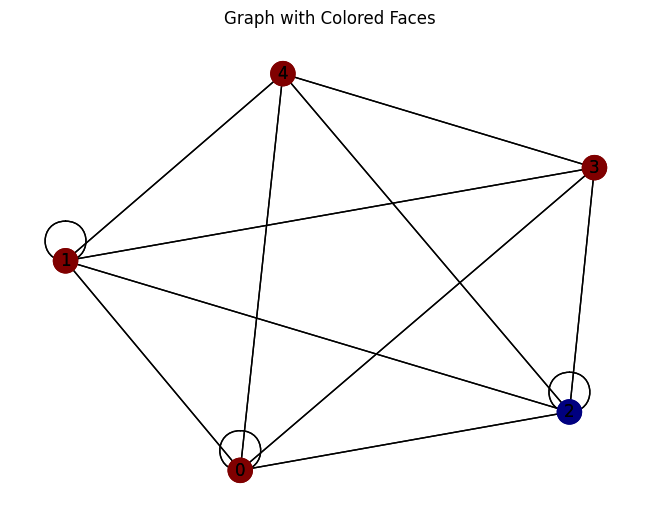

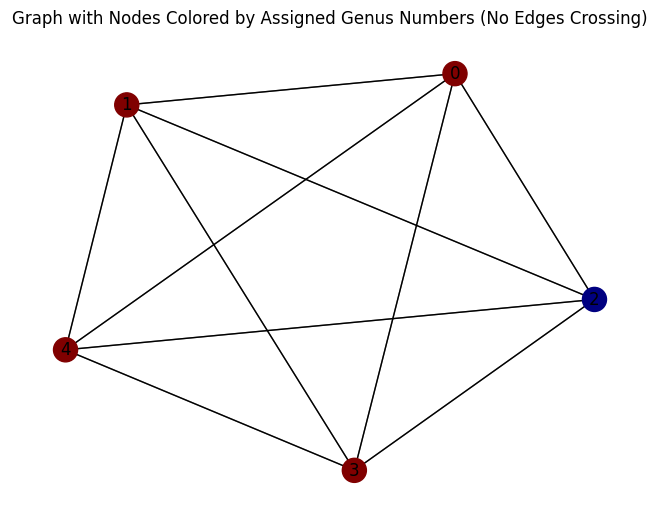

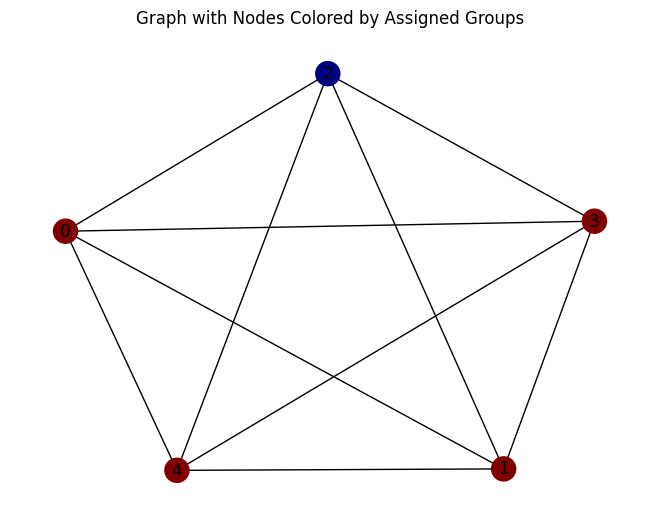

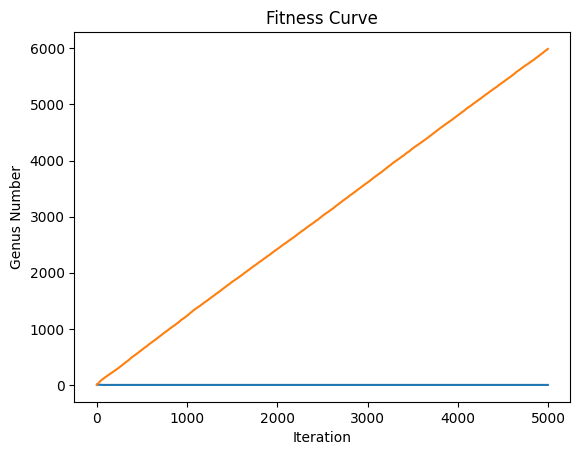

In [240]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to draw the graph
def draw_graph(adjacency_list, best_state):
    G = nx.Graph()
    for node, neighbors in adjacency_list.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    node_colors = [best_state[node] for node in G.nodes]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.jet)
    plt.title('Graph with Nodes Colored by Assigned Groups')
    plt.show()

def draw_graph_without_crossing(adjacency_list, best_state):
    # Create a graph from the adjacency list
    G = nx.Graph(adjacency_list)
    
    # Determine the positions for the nodes using the Fruchterman-Reingold layout
    pos = nx.fruchterman_reingold_layout(G)
    
    # Draw the graph with nodes colored by assigned genus numbers
    node_colors = [best_state[node] for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.jet)
    
    # Apply edge routing to minimize edge crossings
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='k', alpha=0.5)
    
    plt.title('Graph with Nodes Colored by Assigned Genus Numbers (No Edges Crossing)')
    plt.show()

# Function to draw the fitness curve
def draw_fitness_curve(decoded_data):
    iterations = [data[0] for data in decoded_data]
    fitness_values = [data[1] for data in decoded_data]
    plt.plot(iterations, fitness_values)  # Connect points with a line
    plt.ylabel('Genus Number')
    plt.xlabel('Iteration')
    plt.title('Fitness Curve')
    plt.show()

def draw_graph_with_faces(adjacency_list, best_state):
    # Create a graph from the adjacency list
    G = nx.Graph(adjacency_list)
    
    # Determine the positions for the nodes to avoid edge crossings
    pos = nx.spring_layout(G)
    
    # Find the faces of the graph
    faces = list(nx.cycle_basis(G))
    
    # Create a color map for faces
    face_colors = range(len(faces))
    
    # Draw the graph with colored faces
    nx.draw(G, pos, with_labels=True, node_color=best_state, cmap=plt.cm.jet)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_nodes(G, pos, node_color=best_state, cmap=plt.cm.jet)
    plt.title('Graph with Colored Faces')
    plt.show()



# Draw the graph with colored faces
draw_graph_with_faces(final_adjacency_list, best_state)

draw_graph_without_crossing(adjacency_list, best_state)

# Draw the graph
draw_graph(adjacency_list, best_state)
# Draw the fitness curve
draw_fitness_curve(decoded_data)


Iteration 0: Genus number [5. 2.]
Corresponding Adjacency List:
Node 0: Neighbors [2, 1, 3, 4]
Node 1: Neighbors [0, 2, 3, 4]
Node 2: Neighbors [0, 1, 3, 4]
Node 3: Neighbors [0, 2, 1, 4]
Node 4: Neighbors [0, 2, 1, 3]
Iteration 1: Genus number [4. 4.]
Corresponding Adjacency List:
Node 0: Neighbors [2, 1, 3, 4]
Node 1: Neighbors [0, 2, 3, 4]
Node 2: Neighbors [0, 1, 3, 4]
Node 3: Neighbors [0, 2, 1, 4]
Node 4: Neighbors [0, 2, 1, 3]
Iteration 2: Genus number [2. 6.]
Corresponding Adjacency List:
Node 0: Neighbors [2, 1, 3, 4]
Node 1: Neighbors [0, 2, 3, 4]
Node 2: Neighbors [0, 1, 3, 4]
Node 3: Neighbors [0, 2, 1, 4]
Node 4: Neighbors [0, 2, 1, 3]
Iteration 3: Genus number [4. 8.]
Corresponding Adjacency List:
Node 0: Neighbors [2, 1, 3, 4]
Node 1: Neighbors [0, 2, 3, 4]
Node 2: Neighbors [0, 1, 3, 4]
Node 3: Neighbors [0, 2, 1, 4]
Node 4: Neighbors [0, 2, 1, 3]
Iteration 4: Genus number [ 3. 10.]
Corresponding Adjacency List:
Node 0: Neighbors [2, 1, 3, 4]
Node 1: Neighbors [0, 2, 3,

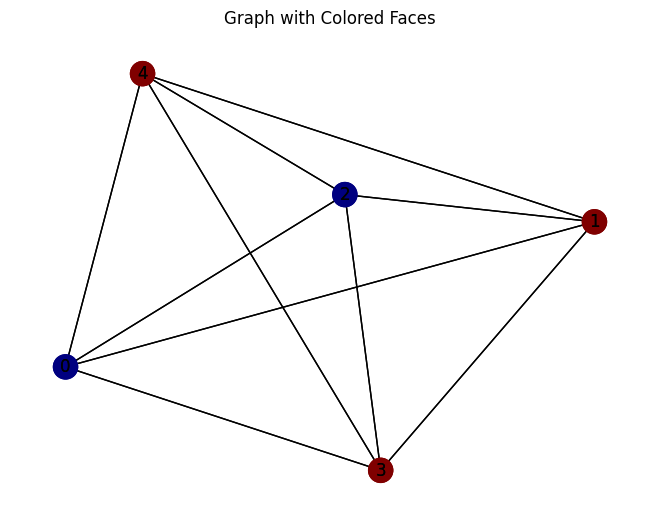

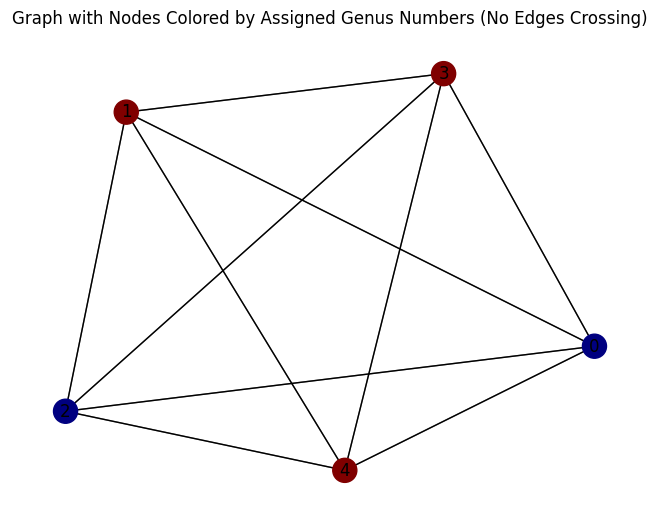

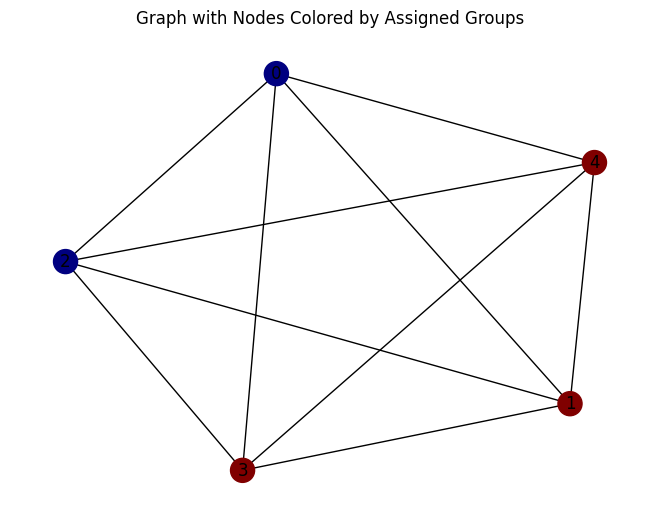

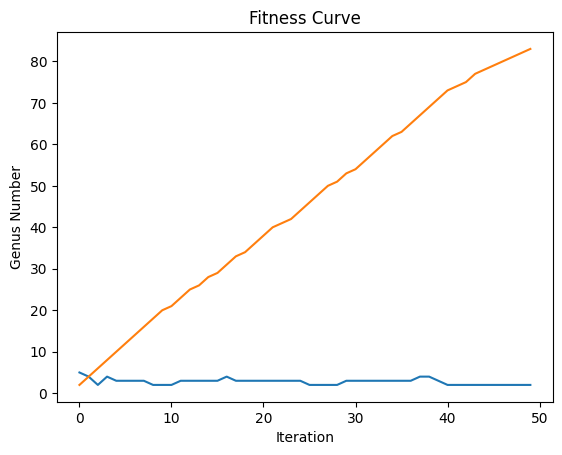

In [23]:
import numpy as np
import mlrose_hiive as mlrose
import networkx as nx
import matplotlib.pyplot as plt

class GraphGenusFitness:
    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def evaluate(self, state):
        # Convert the state (a permutation) into a new adjacency list
        new_adj_list = {i: [] for i in range(len(self.adjacency_list))}
        for i, vertex in enumerate(state):
            new_adj_list[i] = [state[neighbor] for neighbor in self.adjacency_list[vertex]]

        # Create a new graph with the updated adjacency list
        G = nx.Graph()
        for node, neighbors in new_adj_list.items():
            for neighbor in neighbors:
                if not G.has_edge(node, neighbor):
                    G.add_edge(node, neighbor)

        # Compute the Euler characteristic
        V = len(G.nodes)
        E = len(G.edges)
        F = 1  # Simplified formula for planar graphs: Assume 1 face for simplicity

        # The genus (assuming connected graph and orientable surface)
        genus = (2 - (V - E + F)) // 2

        return genus

    def get_prob_type(self):
        return 'discrete'

# Define the optimization problem
adjacency_list = {
    0: [1, 2, 3, 4],
    1: [0, 2, 3, 4],
    2: [0, 1, 3, 4],
    3: [0, 1, 2, 4],
    4: [0, 1, 2, 3]
}

problem = mlrose.DiscreteOpt(length=len(adjacency_list), fitness_fn=GraphGenusFitness(adjacency_list),
                             maximize=False, max_val=len(adjacency_list))

# Choose and configure the optimization algorithm
schedule = mlrose.GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001)

# Run simulated annealing
result = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=10, max_iters=50,
                                    random_state=62, curve=True)

# Extract the best state and fitness curve
best_state, best_fitness, fitness_curve = result

# Decode fitness curve data
decoded_data = [(i, fitness) for i, fitness in enumerate(fitness_curve)]

# Initialize the final adjacency list with the initial adjacency list
final_adjacency_list = adjacency_list.copy()

# Initialize previous genus number for comparison
prev_genus = None

# Iterate over the decoded data to update the adjacency list at each iteration
for iteration, genus_number in decoded_data:
    if prev_genus is None or not np.array_equal(genus_number, prev_genus):
        print(f"Iteration {iteration}: Genus number {genus_number}")
        # Print the current state and corresponding adjacency list
        current_state = np.argsort(best_state)
        new_adj_list = {i: [] for i in range(len(adjacency_list))}
        for i, vertex in enumerate(current_state):
            new_adj_list[i] = [current_state[neighbor] for neighbor in adjacency_list[vertex]]

        # Update final adjacency list
        final_adjacency_list = new_adj_list

        # Print the adjacency list
        print("Corresponding Adjacency List:")
        for node, neighbors in final_adjacency_list.items():
            print(f"Node {node}: Neighbors {neighbors}")

        prev_genus = genus_number

# Visualization Functions

def draw_graph(adjacency_list, best_state):
    G = nx.Graph()
    for node, neighbors in adjacency_list.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    node_colors = [best_state[node] for node in G.nodes]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.jet)
    plt.title('Graph with Nodes Colored by Assigned Groups')
    plt.show()

def draw_graph_without_crossing(adjacency_list, best_state):
    G = nx.Graph(adjacency_list)
    pos = nx.spring_layout(G)
    node_colors = [best_state[node] for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.jet)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='k', alpha=0.5)
    plt.title('Graph with Nodes Colored by Assigned Genus Numbers (No Edges Crossing)')
    plt.show()

def draw_fitness_curve(decoded_data):
    iterations = [data[0] for data in decoded_data]
    fitness_values = [data[1] for data in decoded_data]
    plt.plot(iterations, fitness_values)  # Connect points with a line
    plt.ylabel('Genus Number')
    plt.xlabel('Iteration')
    plt.title('Fitness Curve')
    plt.show()

def draw_graph_with_faces(adjacency_list, best_state):
    G = nx.Graph(adjacency_list)
    pos = nx.spring_layout(G)
    faces = list(nx.cycle_basis(G))
    face_colors = range(len(faces))
    nx.draw(G, pos, with_labels=True, node_color=best_state, cmap=plt.cm.jet)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_nodes(G, pos, node_color=best_state, cmap=plt.cm.jet)
    plt.title('Graph with Colored Faces')
    plt.show()

# Draw the graph with colored faces
draw_graph_with_faces(final_adjacency_list, best_state)
draw_graph_without_crossing(adjacency_list, best_state)
draw_graph(adjacency_list, best_state)
draw_fitness_curve(decoded_data)


In [19]:
import numpy as np
import mlrose_hiive as mlrose
import networkx as nx
import matplotlib.pyplot as plt

class GraphGenusFitness:
    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def evaluate(self, state):
        # Convert the state (a permutation) into a new adjacency list
        new_adj_list = {i: [] for i in range(len(self.adjacency_list))}
        for i, vertex in enumerate(state):
            new_adj_list[i] = [state[neighbor] for neighbor in self.adjacency_list[vertex]]

        # Create a new graph with the updated adjacency list
        G = nx.Graph()
        for node, neighbors in new_adj_list.items():
            for neighbor in neighbors:
                if not G.has_edge(node, neighbor):
                    G.add_edge(node, neighbor)

        # Compute the Euler characteristic
        V = len(G.nodes)
        E = len(G.edges)
        F = 1  # Simplified formula for planar graphs: Assume 1 face for simplicity

        # The genus (assuming connected graph and orientable surface)
        genus = (2 - (V - E + F)) // 2

        return genus

    def get_prob_type(self):
        return 'discrete'

def complete_graph_adjacency_list(k):
    adjacency_list = {}
    for i in range(k):
        neighbors = [j for j in range(k) if j != i]
        adjacency_list[i] = neighbors
    return adjacency_list

k = 5
adjacency_list = complete_graph_adjacency_list(k)
print(adjacency_list)

# Define the optimization problem
problem = mlrose.DiscreteOpt(length=len(adjacency_list), fitness_fn=GraphGenusFitness(adjacency_list),
                             maximize=False, max_val=len(adjacency_list))


{0: [1, 2, 3, 4], 1: [0, 2, 3, 4], 2: [0, 1, 3, 4], 3: [0, 1, 2, 4], 4: [0, 1, 2, 3]}


In [8]:
# Choose and configure the optimization algorithm
schedule = mlrose.GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001)

# Run simulated annealing
result = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=1000, max_iters=5000,
                                    random_state=62, curve=True)

# Extract the best state and fitness curve
best_state = result[0]
fitness_curve = result[2]

# Decode fitness curve data
decoded_data = [(i, fitness) for i, fitness in enumerate(fitness_curve)]

# Initialize the final adjacency list with the initial adjacency list
final_adjacency_list = adjacency_list.copy()

# Initialize previous genus number for comparison
prev_genus = None

# Iterate over the decoded data to update the adjacency list at each iteration
for iteration, genus_number in decoded_data:
    if prev_genus is None or genus_number != prev_genus:
        print(f"Iteration {iteration}: Genus number {genus_number}")
        # Print the current state and corresponding adjacency list
        current_state = np.argsort(best_state)
        new_adj_list = {i: [] for i in range(len(adjacency_list))}
        for i, vertex in enumerate(current_state):
            new_adj_list[i] = [current_state[neighbor] for neighbor in adjacency_list[vertex]]

        # Update final adjacency list
        final_adjacency_list = new_adj_list

        # Print the adjacency list
        print("Corresponding Adjacency List:")
        for node, neighbors in final_adjacency_list.items():
            print(f"Node {node}: Neighbors {neighbors}")

        prev_genus = genus_number


Iteration 0: Genus number [5. 2.]
Corresponding Adjacency List:
Node 0: Neighbors [2, 0, 3, 4]
Node 1: Neighbors [0, 1, 3, 4]
Node 2: Neighbors [2, 1, 3, 4]
Node 3: Neighbors [2, 0, 1, 4]
Node 4: Neighbors [2, 0, 1, 3]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

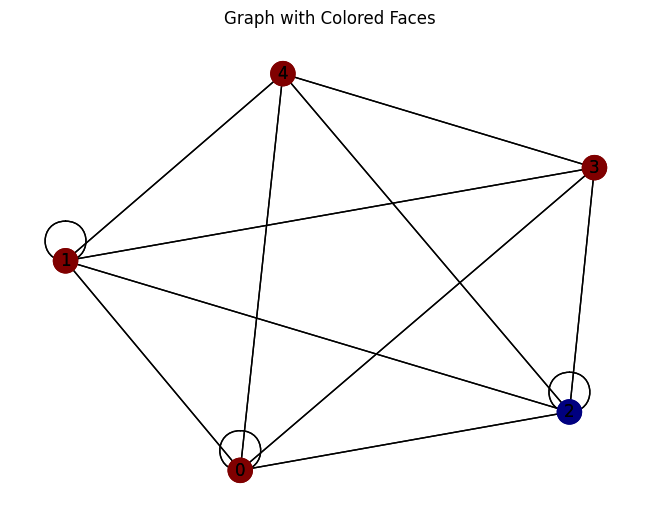

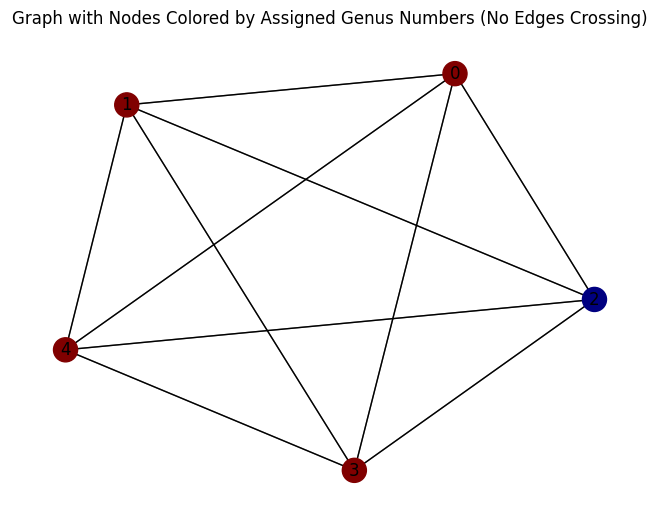

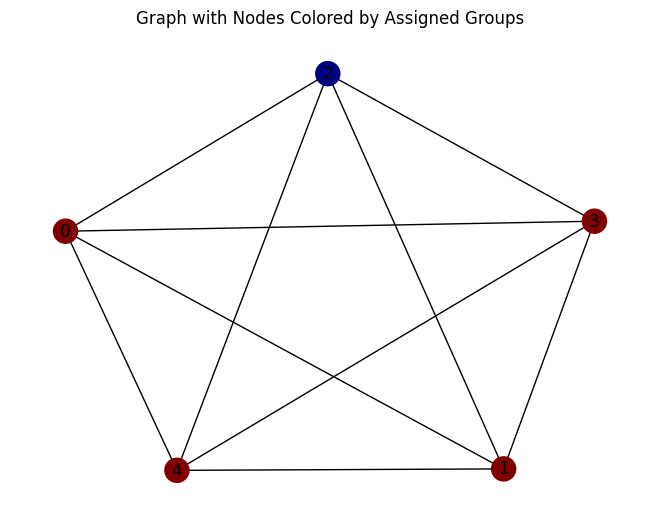

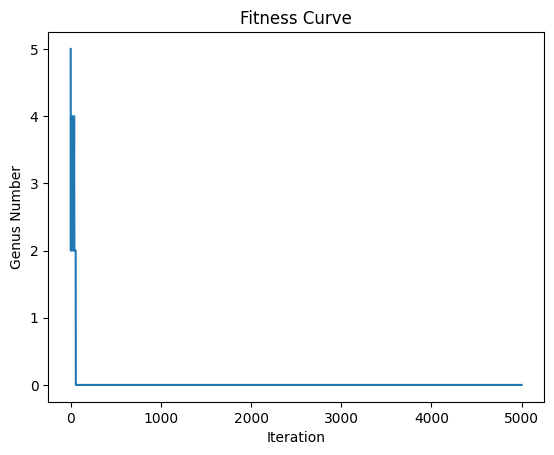

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw_graph(adjacency_list, best_state):
    G = nx.Graph()
    for node, neighbors in adjacency_list.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    node_colors = [best_state[node] for node in G.nodes]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.jet)
    plt.title('Graph with Nodes Colored by Assigned Groups')
    plt.show()

def draw_graph_without_crossing(adjacency_list, best_state):
    G = nx.Graph(adjacency_list)
    pos = nx.spring_layout(G)
    node_colors = [best_state[node] for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.jet)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='k', alpha=0.5)
    plt.title('Graph with Nodes Colored by Assigned Genus Numbers (No Edges Crossing)')
    plt.show()

def draw_fitness_curve(decoded_data):
    iterations = [data[0] for data in decoded_data]
    fitness_values = [data[1] for data in decoded_data]
    plt.plot(iterations, fitness_values)  # Connect points with a line
    plt.ylabel('Genus Number')
    plt.xlabel('Iteration')
    plt.title('Fitness Curve')
    plt.show()

def draw_graph_with_faces(adjacency_list, best_state):
    G = nx.Graph(adjacency_list)
    pos = nx.spring_layout(G)
    faces = list(nx.cycle_basis(G))
    face_colors = range(len(faces))
    nx.draw(G, pos, with_labels=True, node_color=best_state, cmap=plt.cm.jet)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_nodes(G, pos, node_color=best_state, cmap=plt.cm.jet)
    plt.title('Graph with Colored Faces')
    plt.show()

# Draw the graph with colored faces
draw_graph_with_faces(final_adjacency_list, best_state)
draw_graph_without_crossing(adjacency_list, best_state)
draw_graph(adjacency_list, best_state)
draw_fitness_curve(decoded_data)
